In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
data_file = "Student_performance_data.csv"

# Read the mouse data and the study results
studentsAll_df = pd.read_csv(data_file)
studentsAll_df.shape

(2392, 15)

## Correlation between Parental Education and Parental Support

The correlation between Parental Education and Parental Support is -0.02


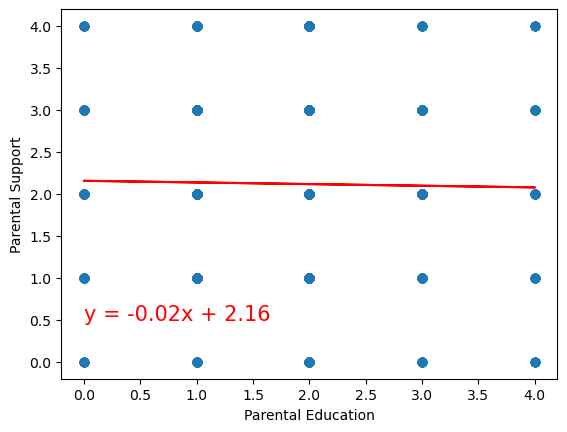

In [2]:
x_values = studentsAll_df['ParentalEducation']
y_values = studentsAll_df['ParentalSupport']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between Parental Education and Parental Support is {round(correlation[0],2)}")

plt.close('all')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,0.5), fontsize=15, color="red")
plt.xlabel('Parental Education')
plt.ylabel('Parental Support')

plt.show()

## Correlation between Student Ethnicity and GPA

In [3]:
# create dataframe of AB students, those with GPA >= 3 
studentsAB_df = studentsAll_df.loc[studentsAll_df['GPA'] >= 3.00]
studentsAB_df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.04,1
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.08,1
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.57,0
38,1039,15,1,1,1,2.949078,3,1,1,1,1,0,0,3.02,1
44,1045,18,1,0,1,18.921512,1,1,3,1,1,0,0,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,3355,16,1,0,2,1.565490,4,1,4,1,1,0,0,3.98,4
2358,3359,16,0,0,2,8.367667,2,0,4,1,0,0,0,3.29,1
2368,3369,15,0,0,4,6.682728,3,0,2,0,0,1,1,3.16,1
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.46,0


In [4]:
# Group the AB students by ethnicity
studentsAB_ethnicgrps = studentsAB_df.groupby('Ethnicity')['StudentID']
studentsAB_ethnicgrps_size = studentsAB_ethnicgrps.count()

studentsAll_ethnicgrps_size = studentsAll_df.groupby('Ethnicity')['StudentID'].count()
studentsAll_ethnicgrps_size

# studentsAB_ethnicgrps_size
for i in range(len(studentsAll_ethnicgrps_size)):
    print(f"AB size [{studentsAB_ethnicgrps_size[i]}] / All size [{studentsAll_ethnicgrps_size[i]}]")


AB size [160] / All size [1207]
AB size [75] / All size [493]
AB size [66] / All size [470]
AB size [27] / All size [222]


## 

In [5]:
## Bars to show the ethnicity size
students_ethnicsize_df = pd.DataFrame(['Caucasian', 'African American', 'Asian', 'Other']) #, columns='StudentID') #.sort_values('')
students_ethnicsize_df['Overall Count'] = studentsAll_ethnicgrps_size
students_ethnicsize_df['AB Count']      = studentsAB_ethnicgrps_size
students_ethnicsize_df['AB Percent']    = studentsAB_ethnicgrps_size / studentsAll_ethnicgrps_size * 100
students_ethnicsize_df.set_index(0, inplace=True)
students_ethnicsize_df.index.name=None
students_ethnicsize_df

# students_ethnicsize_df.plot(kind='bar', xlabel='Ethnicity', ylabel='Number of Students', rot=0)


,Overall Count,AB Count,AB Percent
Caucasian,1207,160,13.256007
African American,493,75,15.212982
Asian,470,66,14.042553
Other,222,27,12.162162


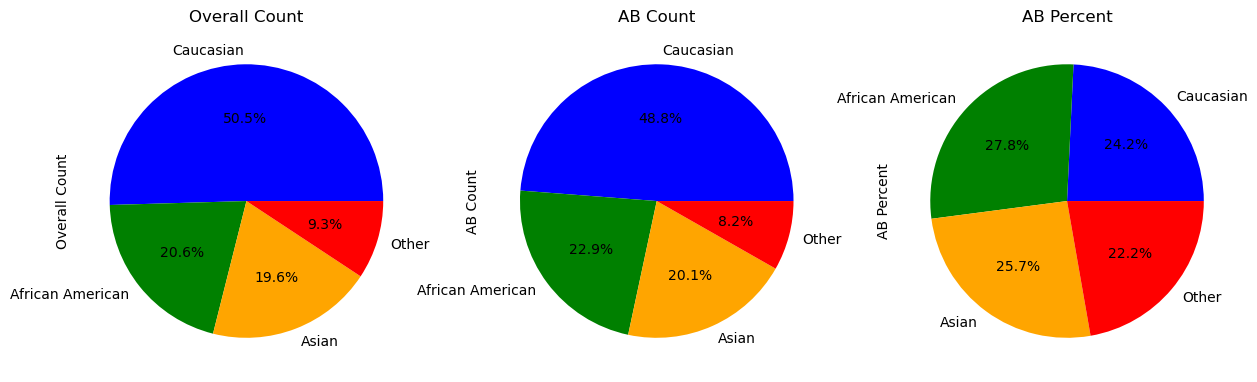

In [6]:
colors = ['blue', 'green', 'orange', 'red']
students_ethnicsize_df.plot(kind='pie', subplots=True, title=['Overall Count', 'AB Count', 'AB Percent'],# startangle=40,
                            colors=colors, autopct="%1.1f%%", figsize=(15,15), legend=False)

plt.savefig('Fig1.png')

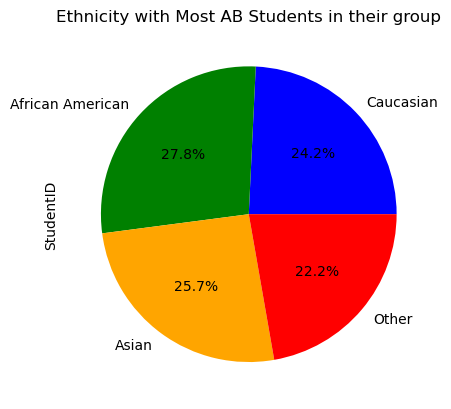

In [38]:
# Look at the percentage of AB students against their ethnicity group size
studentsAB_ethnicgrps_pct = studentsAB_ethnicgrps_size / studentsAll_ethnicgrps_size * 100
round(studentsAB_ethnicgrps_pct, 2)

studentsAB_ethnicgrps_pct.plot(kind='pie', subplots=True, title=['Ethnicity with Most AB Students in their group'],
                            labels=labels, colors=colors, autopct="%1.1f%%", legend=False)
plt.show()

## Correlation between Gender and GPA

,Overall Count,AB Count,AB Percent
Male,1170,164,14.017094
Female,1222,164,13.420622


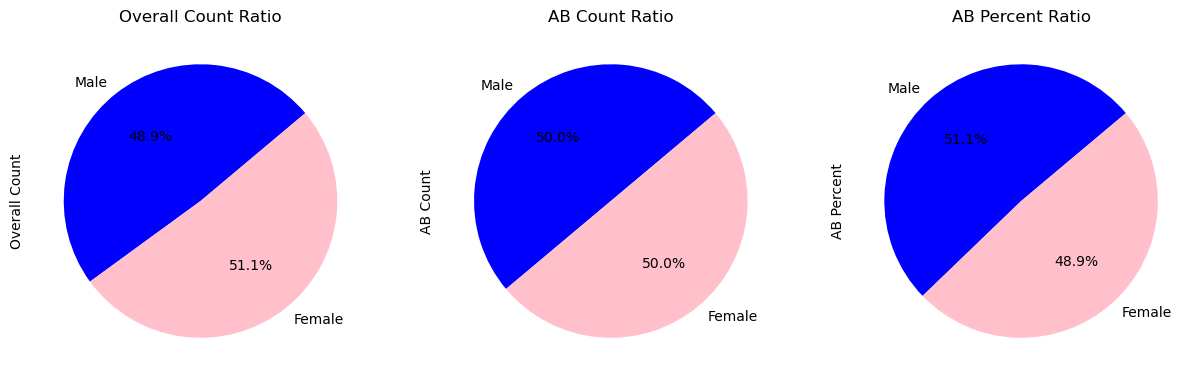

In [9]:
# Group the AB students by gender
studentsAB_gendergrps_size = studentsAB_df.groupby('Gender')['StudentID'].count()

studentsAll_gendergrps_size = studentsAll_df.groupby('Gender')['StudentID'].count()
studentsAll_gendergrps_size

studentsAB_gendersize_df = pd.DataFrame(['Male', 'Female'])
studentsAB_gendersize_df['Overall Count'] = studentsAll_gendergrps_size
studentsAB_gendersize_df['AB Count']      = studentsAB_gendergrps_size
studentsAB_gendersize_df['AB Percent']    = studentsAB_gendergrps_size / studentsAll_gendergrps_size * 100
studentsAB_gendersize_df.set_index(0, inplace=True)

# studentsAB_gendersize_df.plot(kind='bar', xlabel='Gender', ylabel='Number of Students', rot=0)

labels = ['Male', 'Female']
colors = ['blue', 'pink']
studentsAB_gendersize_df.plot(kind='pie', subplots=True, title=['Overall Count Ratio', 'AB Count Ratio', 'AB Percent Ratio'], startangle=40,
                            labels=labels, colors=colors, autopct="%1.1f%%", figsize=(15,15), legend=False)

# Look at the percentage of AB students against their gender group size
# studentsAB_gendergrps_pct = studentsAB_gendergrps_size / studentsAll_gendergrps_size * 100
# round(studentsAB_ethnicgrps_pct, 2)

# studentsAB_ethnicgrps_pct.plot(kind='pie', subplots=True, title=['Ethnicity with Most AB Students in their group'],
#                             labels=labels, colors=colors, autopct="%1.1f%%", legend=False)
studentsAB_gendersize_df.index.name = None
studentsAB_gendersize_df